# Практическая работа №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0381 Просекин Тимур. Вариант №15

## Цель работы
Овладеть навыками работы с математическими пакетами для статисти-
ческого анализа социальных сетей

## Основные теоретические положения

**Диада** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними: $D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** $-$ тройка чисел $M, A, N$, где:

$M = \sum_{i<j} X_{ij} X_{ji}$

$A = X_{++} - 2M$

$N = C^2_g - A - M$

**Индекс взаимности Каца-Пауэлла** (Reciprocity of Katz and Powell) $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

$-\infty < \rho_{кр} \leqslant 1$.

Если $\rho_{кр} = 0$, то акторы не имеют склонности взаимно выбирать друг друга.

Если $\rho_{кр} = 1$, то акторы показывают максимальную тенденцию к взаимному выбору друг друга.

Если $\rho_{кр} < 0$, то акторы склонны образовывать односторонние связи или не образовывать их вообще.

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

Для фиксированного выбора из $d$ акторов:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.

Вероятность того, что связь будет взаимной для двух акторов:

$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$

Для свободного выбора:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):

$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}.$

**Индекс взаимности Бандиопадхьяйя** $-$ индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}},$

где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g,$

$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g,$

$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+}).$

**Вычисление доверительного интервала для оценки P.**

Оценка параметра $P$:

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$

Доверительный интервал: $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$, где $\alpha - $ некоторый уровень значимости, $(1 - \alpha) - $ доверительная надёжность. 

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек про-
вести статистический анализ случайно смоделированного ориентирован-
ного графа. Полученные результаты содержательно проинтерпретиро-
вать

## Выполнение работы
Язык программирования - R.

In [2]:
install.packages("igraph")
install.packages("network")
install.packages("statnet")
library(igraph)
library(network)
library(statnet)
# 15V, g = 82, p = 0.59, P0 = 0.74, a = 0.01

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘statnet.common’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘robustbase’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘networkDynamic’



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



‘network’ 1.18.0 (2022-10-05), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attaching package: ‘network’


The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertic

1. Моделирование случайного орграфа $\mathscr{G}_d$ на основе модели Эрдеша-Реньи: $\mathscr{G}_d = \mathscr{G}_d$(g, p), где g - количество акторов, p - вероятность появления дуги между акторами. g = 82, p = 0.59.

In [28]:
g <- 82
p <- 0.59
graph <- erdos.renyi.game(g, p, "gnp", TRUE)

2. Отображние полученного орграфа.

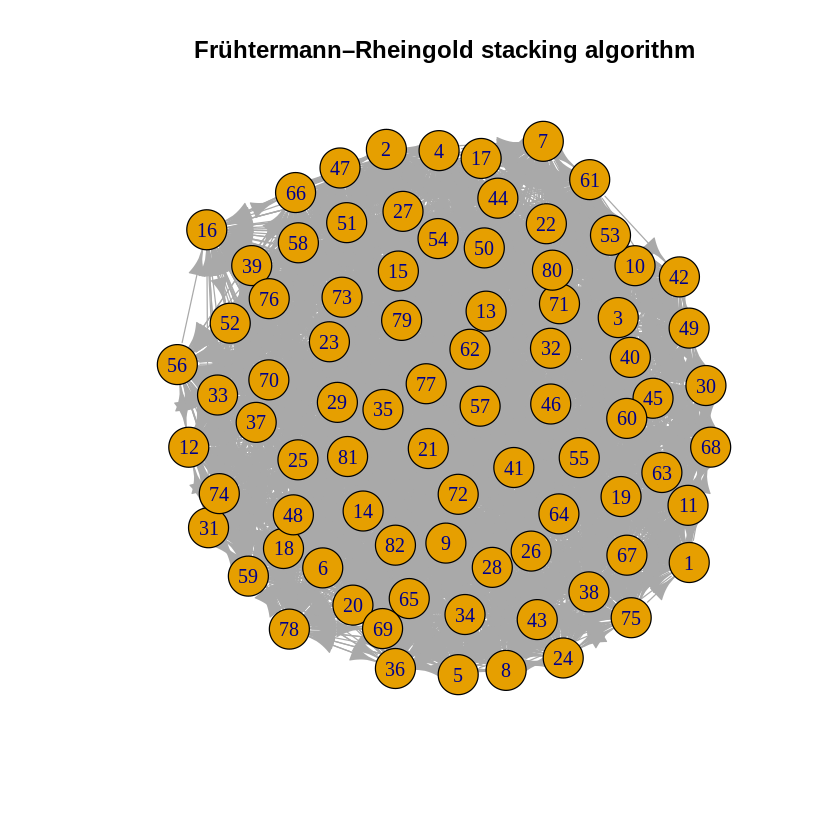

In [29]:
plot(graph, layout=layout_with_fr(graph), main="Frühtermann–Rheingold stacking algorithm")

3. Вычислени пятичисловой сводки сети для данного графа.

«Пятичисловая сводка» сети:

(a) Размер сети

(b) Плотность сети

(c) Число компонент в сети

(d) Диаметр сети

(e) Коэффициент кластеризации


In [30]:
data <- as_adjacency_matrix(graph)
net <- as.network(data, matrix.type = "adjacency", directed = TRUE)

net_size <- gorder(graph)
density = gden(as.sociomatrix(net))

cat("(a) Размер сети: ", net_size, "\n")
cat("(b) Плотность сети: ", density, "\n")
cat("(с) Число компонент: ", components(net), "\n")
cat("(d) Диаметр сети: ", diameter(graph), '\n')
cat("(e) Коэффициент кластеризации: ", gtrans(as.sociomatrix(net)), '\n')

<sparse>[ <logic> ]: .M.sub.i.logical() maybe inefficient



(a) Размер сети:  82 
(b) Плотность сети:  0.5953026 
(с) Число компонент:  1 
(d) Диаметр сети:  2 
(e) Коэффициент кластеризации:  0.5934841 


4. Вычисление цензуса диад для данной модели.

In [31]:
census <- dyad_census(graph)
census

$mut
[1] 1169

$asym
[1] 1616

$null
[1] 536

Количество пар с взаимными связями: 1169.

Количество пар с невзаимными связями: 1616.

Количество пар без связей: 563.

5. Вычисление оценки индекса ввзаимности Каца-Пауэла при фиксированом и свободном выборе.

In [32]:
#при фиксированном d = 30
d <- 30
m <- census$mut
p1 <- (2*(g-1)*m - g * d^2)/(g*d*(g - 1 - d))
p1

#при свободном d
a_matrix <- as.matrix(data)
l <- sum(rowSums(a_matrix))
l2 <- sum(rowSums(a_matrix)^2)
p2 <- (2*(g - 1)^2 * m - l^2 + l2)/(l*(g - 1)^2 - l^2 + l2)
p2

[1] 0.9212339

[1] -0.009775105

Видно, что при фиксированном выборе, акторы показывают тенденцию к взаимному выбору друг друга.
При свободном же выборе акторы склонны образовывать односторонние связи или не образовывать их вообще.

6. Вычисление вероятности того, что связь будет взаимной для каждого случая.

In [33]:
#при фиксированном выборе
p_fixed <- (d / (g - 1)) * ((d / (g - 1)) + p1*(g - 1 - d) / (g - 1))
p_fixed

#при свободном выборе
p_free <- (rowSums(a_matrix) * colSums(a_matrix)) / (g - 1)^2
p_free_average <- sum(p_free) / g
p_free_average

[1] 0.3520024

[1] 0.3544727

7. Вычисление индекса взаимности Бандиопадхьяйя.

In [34]:
g_f <- function(sum_r, g, t) {
    sum_x <- sum(sum_r[1:t])
    sum_min <- 0   
    for (i in (t+1):g) {
        sum_min <- sum_min + min(c(t, sum_r[i]))
    }
    return(sum_x - t*(t-1) - sum_min)
}

f <- function(sum_r, g, t) {
    sum_x <- sum(sum_r[1:t])
    c_t_2 <- factorial(t) / (factorial(2) * factorial(t - 2))
    return(sum_x - t*(g-1) - c_t_2)
}

sum_r <- rowSums(a_matrix)

g_f_r <- rep(2, g - 1)
for (t in 2:(g-1)) {
    g_f_r[t] <- g_f(sum_r, g, t)
}

f_r <- rep(2, g)
for (t in 2:g) {
    f_r[t] <- f(sum_r, g, t)
}

m_max <- floor(0.5 * sum(sum_r[1:g]) - max(g_f_r))
m_min <- max(f_r)

b_index <- (m - m_min) / (m_max - m_min)
b_index

[1] 0.591485

Полученный индекс приблизительно равен p = 0.59

8. Проверка нулевой гипотезы о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g − 1), \frac{1}{2})$ при уровне значимости $\alpha = 0.01$. Определим максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [35]:
a <- 0.01
l_a <- sum(a_matrix)
binom.test(l_a, g*(g - 1), p = 0.5)


	Exact binomial test

data:  l_a and g * (g - 1)
number of successes = 3954, number of trials = 6642, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5833835 0.6071380
sample estimates:
probability of success 
             0.5953026 


Значение p-value меньше $\alpha$ в 45454545454545.45 раз. Следовательно, нулевая гипотеза не выполняется и вероятность успеха не равна 0.5. Максимальный уровень значимости, при котором гипотеза не отвергается: p-value $< 2.2 \cdot 10^{-16}$.

9. Проверка нулевой гипотезы о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g−1), 𝑃_0), P_0 = 0.74$ при уровне значимости $\alpha = 0.01$. Определение максимального уровня значимости, при котором нулевая гипотеза не отвергается.

In [36]:
p0 <- 0.74
binom.test(l_a, g*(g - 1), p=p0)


	Exact binomial test

data:  l_a and g * (g - 1)
number of successes = 3954, number of trials = 6642, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.74
95 percent confidence interval:
 0.5833835 0.6071380
sample estimates:
probability of success 
             0.5953026 


Значение p-value меньше $\alpha$. Следовательно, нулевая гипотеза не выполняется. Максимальный уровень значимости, при котором гипотеза не отвергается: p-value $= 2.2 \cdot 10^{-16}$.

10. Построение доверительного интервала для оценки параметра p с доверительной надежностью (1 - $\alpha$)

a) Оценим параметр p:

In [38]:
p_e <- (sum(a_matrix)) / (g*(g - 1))
p_e

[1] 0.5953026

b) Найдём $z_{\alpha/2}$:

In [39]:
f_laplace <- 0.5 - a/2
f_laplace

[1] 0.495

С помощью таблицы значений функции Лапласа, получаем, что $z_{\alpha/2} \approx 2.58$

c) Построим доверительный интервал

In [40]:
z_a <- 2.58
p_l <- p_e - z_a * sqrt((p_e * (1 - p_e)) / (g * (g - 1)))
p_u <- p_e + z_a * sqrt((p_e * (1 - p_e)) / (g * (g - 1)))                      
p_l
p_u

[1] 0.5797643

[1] 0.610841

Получили доверительный интервал $0.58 \leqslant p \leqslant 0.61$. Так как p = 0.59, сделаем вывод, что доверительный интервал вычислен верно с доверительной надёжностью (1 - $\alpha$).

## Выводы

В ходе данной практической работы был проведен статистический анализ случайно смоделированного орграфа с использованием библиотек и встроенных функций языка R. Проверена корректность посчитанных значений - большинство из них примерно равно входному значению p.